#### EQUIPO 1
Edgar Bladimir López Alonzo 1753141.

Cristian Antonio Jaramillo Arriaga 1680776.
        
#### GRUPO 

012

#### FRECUENCIA 

Martes y Jueves 6:30 pm a 8:00 pm.

#### PROFESORA 

Mayra Cristina Berrones Reyes.


## Título de la base de datos
Video Game Sales

https://www.kaggle.com/gregorut/videogamesales

## Descripción de los datos

Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias. 

Las columnas incluyen 

●	Rango (Int) - Clasificación de las ventas totales

●	Nombre (String) - El nombre de los juegos

●	Plataforma (String) - Plataforma del lanzamiento de juegos (es decir, PC, PS4, etc.)

●	Año (Int) - Año del lanzamiento del juego

●	Género (String) - Género del juego

●	Editor (String) - Editor del juego

●	NA_Sales (Double) - Ventas en América del Norte (en millones)

●	EU_Sales (Double) - Ventas en Europa (en millones)

●	JP_Sales (Double) - Ventas en Japón (en millones)

●	Other_Sales (Double) - Ventas en el resto del mundo (en millones)

●	Global_Sales (Double) - Total de ventas en todo el mundo.

## Justificación de los datos

En los últimos años los videojuegos se convirtieron en una industria multimillonaria por la tendencia que tiene con los jóvenes del mundo. Debido al desarrollo de la computación, capacidad de procesamiento e imágenes más reales hay una gran batalla de competición entre las empresas desarrolladoras.

## Planteamiento del problema

La fabricación en los videojuegos se ha convertido en un gran problema para las compañías. Hay demasiada demanda en diferentes géneros para  distintos públicos, pero esto no quiere decir que todos tengan la acepción deseada desde el inicio del desarrollo del videojuego. Con esto buscamos orientar la toma de decisión en las compañías para el desarrollo de un videojuego que busquen en qué plataforma apostar y que géneros serían los más factibles para orientar sus desarrollos.

## Objetivo final

Con base a la información dada por la base de datos. 

Objetivo Principal: 

●	Elaborar una herramienta que nos permita saber qué tipo de género del videojuego para ser desarrollado. 

Objetivo secundario:

●	En qué plataforma será factible distribuirlo

## Planeación de la herramienta a utilizar

Utilizando la técnica de regresión lineal se generará una gráfica con cada combinación a nivel consola, género y compañía contra el número de ventas de cada una.

●	Género con ventas

●	Consola con ventas

●	Compañía con ventas

Se planea usar esta técnica ya que tenemos varios puntos que consideramos importantes como lo son el género, consola y compañía, y cada uno está relacionado con la columna central de interés (número de ventas), con lo cual resulta más sencillo con esta técnica generar una gráfica utilizando como X y Y cada uno de estos puntos junto con el número de ventas con la finalidad de comparar cada una de estas gráficas y usarlas como referencia para los objetivos planteados.



## Desarrollo de las herramientas

Tipos de dato en las columnas:


In [7]:
import pandas as pandas
import seaborn as sns
import matplotlib.pyplot as plt

vgSalesOriginal = pandas.read_csv("vgsales.csv",encoding='utf8')

In [8]:
vgSalesOriginal.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

A continuacion se mostraran los 5 primeros regristros de la base de datos, para tener una mejor visualizacion de los datos.

In [5]:
vgSalesOriginal.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Algunos de nuestros datos mostraban informacion nula. Se decidio eliminarlos sin llegar afectar nuestro resultado.

In [9]:
vgSalesOriginal = vgSalesOriginal.dropna()
vgSalesOriginal.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Para fines practicos, se cambiaron los nombres de algunas columnas "clave" que seran las principales para nuestro analisis de datos.

In [11]:
vgSalesOriginal = vgSalesOriginal.rename(columns = {'Name':'NombreJuego'})
vgSalesOriginal = vgSalesOriginal.rename(columns = {'Platform':'Consola'})
vgSalesOriginal = vgSalesOriginal.rename(columns = {'Year':'AnnoPublicacion'})
vgSalesOriginal = vgSalesOriginal.rename(columns = {'Genre':'Genero'})
vgSalesOriginal

,Rank,NombreJuego,Consola,AnnoPublicacion,Genero,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Para tener una mejor manipulacion de los datos, se busco el tipo de genero de videojuego que contienen los datos. Y al mismo tiempo se agruparon los registros por tipo de genero encontrado.

In [12]:
list(vgSalesOriginal.Genero.unique())

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

In [13]:
vgSalesGeneroPlataforma = vgSalesOriginal[vgSalesOriginal['Genero'] == 'Platform']
vgSalesGeneroPlataforma

,Rank,NombreJuego,Consola,AnnoPublicacion,Genero,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
...,...,...,...,...,...,...,...,...,...,...,...
16498,16501,The Land Before Time: Into the Mysterious Beyond,GBA,2006.0,Platform,Game Factory,0.01,0.00,0.00,0.00,0.01
16562,16565,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
16565,16568,Teslagrad,PSV,2015.0,Platform,Rain Games,0.00,0.01,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01


De la misma forma se agruparon los registros por las principales consolas con mayor venta, las cuales son, Playstation 2, Playstation 3, Nintendo DS, Xbox 360 y Wii

In [16]:
vgSalesConsolaSNES = vgSalesOriginal[vgSalesOriginal['Consola'] == 'PS2']
vgSalesConsolaSNES = vgSalesOriginal[vgSalesOriginal['Consola'] == 'PS3']
vgSalesConsolaSNES = vgSalesOriginal[vgSalesOriginal['Consola'] == 'DS']
vgSalesConsolaSNES = vgSalesOriginal[vgSalesOriginal['Consola'] == 'X360']
vgSalesConsolaSNES = vgSalesOriginal[vgSalesOriginal['Consola'] == 'Wii']
vgSalesConsolaSNES

,Rank,NombreJuego,Consola,AnnoPublicacion,Genero,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16517,16520,Teenage Mutant Ninja Turtles,Wii,2007.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16552,16555,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007.0,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16573,16576,Mini Desktop Racing,Wii,2007.0,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


## Estadistica Basica

Se establecieron las columna "fecha" como numeros enteros

In [19]:
import pandas as pandas
import seaborn as sns
import matplotlib.pyplot as plt

vgSalesOriginal = pandas.read_csv("vgsales.csv",encoding='utf8')

vgSalesOriginal.Year.astype("Int32")

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: Int32

Se eliminan los datos no decimales, se agrupa por genero y se saca la suma total de ventas segun los generos

In [20]:
vgSalesGeneroSumatoriaVentas = vgSalesOriginal.drop(['Rank', 'Name', 'Year', 'Platform', 'Publisher'],axis = 1 )
vgSalesGeneroSumatoriaVentas = vgSalesGeneroSumatoriaVentas.groupby(['Genre'], as_index=False).sum()
vgSalesGeneroSumatoriaVentas

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,877.83,525.00,159.95,187.38,1751.18
1,Adventure,105.80,64.13,52.07,16.81,239.04
2,Fighting,223.59,101.32,87.35,36.68,448.91
3,Misc,410.24,215.98,107.76,75.32,809.96
4,Platform,447.05,201.63,130.77,51.59,831.37
5,Puzzle,123.78,50.78,57.31,12.55,244.95
6,Racing,359.42,238.39,56.69,77.27,732.04
7,Role-Playing,327.28,188.06,352.31,59.61,927.37
8,Shooter,582.60,313.27,38.28,102.69,1037.37
9,Simulation,183.31,113.38,63.70,31.52,392.20


Se eliminan los datos no decimales, se agrupa por plataforma y se saca un promedio de ventas.

In [22]:
vgSalesPlataformaSumatoriaVentas = vgSalesOriginal.drop(['Rank', 'Name', 'Year', 'Genre', 'Publisher'],axis = 1 )
vgSalesPlataformaSumatoriaVentas = vgSalesPlataformaSumatoriaVentas.groupby(['Platform'], as_index=False).sum()
vgSalesPlataformaSumatoriaVentas

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2600,90.60,5.47,0.00,0.91,97.08
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,78.87,58.52,97.35,12.63,247.46
3,DC,5.43,1.69,8.56,0.27,15.97
4,DS,390.71,194.65,175.57,60.53,822.49
5,GB,114.32,47.82,85.12,8.20,255.45
6,GBA,187.54,75.25,47.33,7.73,318.50
7,GC,133.46,38.71,21.58,5.18,199.36
8,GEN,19.27,5.52,2.67,0.89,28.36
9,GG,0.00,0.00,0.04,0.00,0.04


Se eliminan los datos no decimales, se agrupa por desarrollador/distribuidor y se sacan los valores maximos de ventas que ha ganado por un juego.

In [23]:
vgSalesPublisherVentasMaximas = vgSalesOriginal.drop(['Rank', 'Name', 'Year', 'Platform', 'Genre'],axis = 1 )
vgSalesPublisherVentasMaximas = vgSalesPublisherVentasMaximas.groupby(['Publisher'], as_index=False).max()
vgSalesPublisherVentasMaximas

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10TACLE Studios,0.06,0.03,0.00,0.00,0.06
1,1C Company,0.01,0.03,0.00,0.01,0.05
2,20th Century Fox Video Games,0.74,0.04,0.00,0.01,0.79
3,2D Boy,0.00,0.03,0.00,0.01,0.04
4,3DO,1.10,0.32,0.00,0.06,1.28
...,...,...,...,...,...,...
573,id Software,0.02,0.00,0.00,0.00,0.03
574,imageepoch Inc.,0.00,0.00,0.03,0.00,0.03
575,inXile Entertainment,0.02,0.06,0.00,0.01,0.10
576,"mixi, Inc",0.00,0.00,0.86,0.00,0.86


Se eliminan los datos no decimales, se agrupa por fecha y se sacan la suma total de ventas que hubo en ese año

In [24]:
vgSalesYearSumatoriaVentas = vgSalesOriginal.drop(['Rank', 'Name', 'Genre', 'Platform', 'Publisher'],axis = 1 )
vgSalesYearSumatoriaVentas = vgSalesYearSumatoriaVentas.groupby(['Year'], as_index=False).sum()
vgSalesYearSumatoriaVentas

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.77
2,1982.0,26.92,1.65,0.00,0.31,28.86
3,1983.0,7.76,0.80,8.10,0.14,16.79
4,1984.0,33.28,2.10,14.27,0.70,50.36
5,1985.0,33.73,4.74,14.56,0.92,53.94
6,1986.0,12.50,2.84,19.81,1.93,37.07
7,1987.0,8.46,1.41,11.63,0.20,21.74
8,1988.0,23.87,6.59,15.76,0.99,47.22
9,1989.0,45.15,8.44,18.36,1.50,73.45


## Graficas

La industria tuvo un gran crecimiento entrando en la epoca de los 2000's, para tener una idea del rango de crecimiento de la industria se hizo una grafica comparando las ventas durante los años registrados en la base de datos.

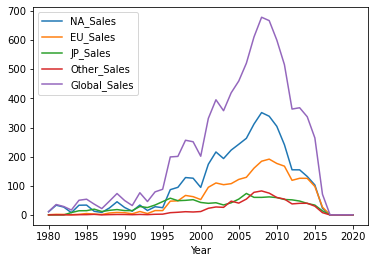

In [27]:
vgSalesYearSumatoriaVentas.plot(x='Year')

Se puede apreciar facilmente que tuvo un gran crecimiento entre los años 2005 - 2010, esto se debe al lanzamiento de diferentes consolas como por ejemplo la Playstation 3 y la Xbox360. Tambien se puede mencionar que durante ese periodo el funcionamiento de antiguas consolas como la Playstation 2 y la Xbox (primera generacion), aun se mostraba activas en el mercado. 

Los años siguientes a partir del 2015 se muestra un declive en la grafica, esto es por la falta de informacion actualizada de la base de datos y tambien por las ventas disminuidas con las cosolas de los años 2005 - 2010 fueron desapareciendo a causa de nuevas consolas. 

Para encontrar que tipo de genero es el que mas vende se genero la siguiente grafica

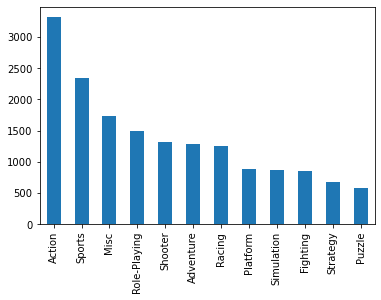

In [25]:
vgSalesOriginal['Genre'].value_counts().plot.bar()

El resultado muestra que el tipo de genero "Action" es el mas vendido globalmente. Con esto nos damos una idea a que tipo de juego se puede desarrollar para tener mas numero de ventas en el mundo.